In [103]:
import cv2
import matplotlib as plt
from PIL import Image

In [104]:
import serial
import time

# COM 포트 설정 (STM32와 연결된 포트로 설정)
com_port = 'COM5'  # STM32가 연결된 포트
baud_rate = 115200  # STM32와 동일한 baud rate
file_path = 'image_data.rgb565'  # 저장할 파일 경로

# 시리얼 포트 열기
ser = serial.Serial(com_port, baud_rate, timeout=1)

# 480x272 RGB565 이미지 크기
image_size = 480 * 272 * 2  # RGB565는 픽셀당 2바이트

# 파일 열기
with open(file_path, 'wb') as file:
    print("Receiving image data...")
    received_bytes = 0
    try:
        while received_bytes < image_size:
            # COM 포트에서 데이터 읽기
            if ser.in_waiting > 0:
                data = ser.read(min(ser.in_waiting, image_size - received_bytes))  # 가용 데이터만큼 읽기
                if data:
                    file.write(data)  # 파일에 쓰기
                    received_bytes += len(data)
                    print(f"Received {received_bytes}/{image_size} bytes")
                else:
                    print("No data received, waiting...")
                    time.sleep(0.1)  # 짧은 대기 시간을 추가해 CPU 점유율 감소
    except KeyboardInterrupt:
        print("Stopped by User")
    finally:
        ser.close()
        print("Serial port closed")
        print(f"Image data saved to {file_path}")


Receiving image data...
Received 512/261120 bytes
Received 1024/261120 bytes
Received 1536/261120 bytes
Received 2048/261120 bytes
Received 2560/261120 bytes
Received 3072/261120 bytes
Received 3584/261120 bytes
Received 4096/261120 bytes
Received 4608/261120 bytes
Received 5120/261120 bytes
Received 5632/261120 bytes
Received 6144/261120 bytes
Received 6656/261120 bytes
Received 7168/261120 bytes
Received 7680/261120 bytes
Received 8192/261120 bytes
Received 8704/261120 bytes
Received 9216/261120 bytes
Received 9728/261120 bytes
Received 10240/261120 bytes
Received 10752/261120 bytes
Received 11264/261120 bytes
Received 11776/261120 bytes
Received 12288/261120 bytes
Received 12800/261120 bytes
Received 13312/261120 bytes
Received 13824/261120 bytes
Received 14336/261120 bytes
Received 14848/261120 bytes
Received 15360/261120 bytes
Received 15872/261120 bytes
Received 16384/261120 bytes
Received 16896/261120 bytes
Received 17408/261120 bytes
Received 17920/261120 bytes
Received 18432/2

In [105]:
from PIL import Image
import numpy as np

# 이미지 크기 및 파일 경로 설정
width, height = 480, 272
input_path = 'image_data.rgb565'
output_path = 'output_image.bmp'

# RGB565 데이터를 읽어들임
with open(input_path, 'rb') as f:
    raw_data = f.read()

# 데이터 변환: RGB565 (2바이트) => RGB888 (3바이트)
image_data = np.zeros((height, width, 3), dtype=np.uint8)

for i in range(width * height):
    pixel_index = i * 2
    pixel = raw_data[pixel_index] | (raw_data[pixel_index + 1] << 8)

    r = (pixel >> 11) & 0x1F  # 상위 5비트 (빨강)
    g = (pixel >> 5) & 0x3F   # 중간 6비트 (초록)
    b = pixel & 0x1F          # 하위 5비트 (파랑)

    # 비트 크기를 8비트에 맞게 확장 (5비트 -> 8비트, 6비트 -> 8비트)
    image_data[i // width, i % width, 0] = (r << 3)  # R
    image_data[i // width, i % width, 1] = (g << 2)  # G
    image_data[i // width, i % width, 2] = (b << 3)  # B

# PIL을 사용하여 이미지 저장
image = Image.fromarray(image_data, 'RGB')
image.save(output_path)
print(f"Image saved to {output_path}")

Image saved to output_image.bmp


In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

#Visiulazation
import matplotlib.pyplot as plt

#image processing
import cv2

#extracting zippped file
import tarfile

#systems
import os

In [107]:
class FaceDetector():

    def __init__(self,faceCascadePath):
        self.faceCascade=cv2.CascadeClassifier(faceCascadePath)


    def detect(self, image, scaleFactor=1.1,
               minNeighbors=5,
               minSize=(30,30)):
        
        #function return rectangle coordinates of faces for given image
        rects=self.faceCascade.detectMultiScale(image,
                                                scaleFactor=scaleFactor,
                                                minNeighbors=minNeighbors,
                                                minSize=minSize)
        return rects

In [108]:
#Frontal face of haar cascade loaded
frontal_cascade_path="haarcascade_frontalface_default.xml"

#Detector object created
fd=FaceDetector(frontal_cascade_path)

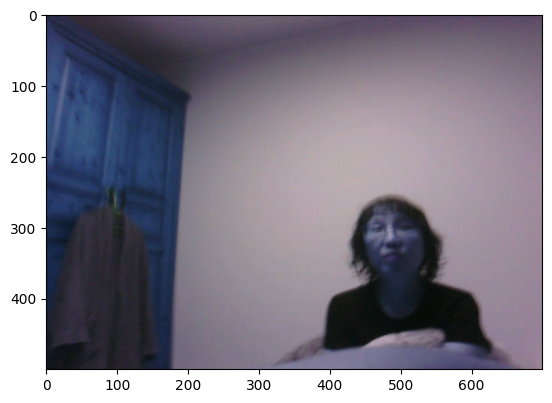

In [109]:
#An image contains faces, loaded
national_team_org=cv2.imread("output_image.bmp")
plt.imshow(national_team_org)
image2_resized = cv2.resize(national_team_org, (700, 500))
plt.imshow(image2_resized)

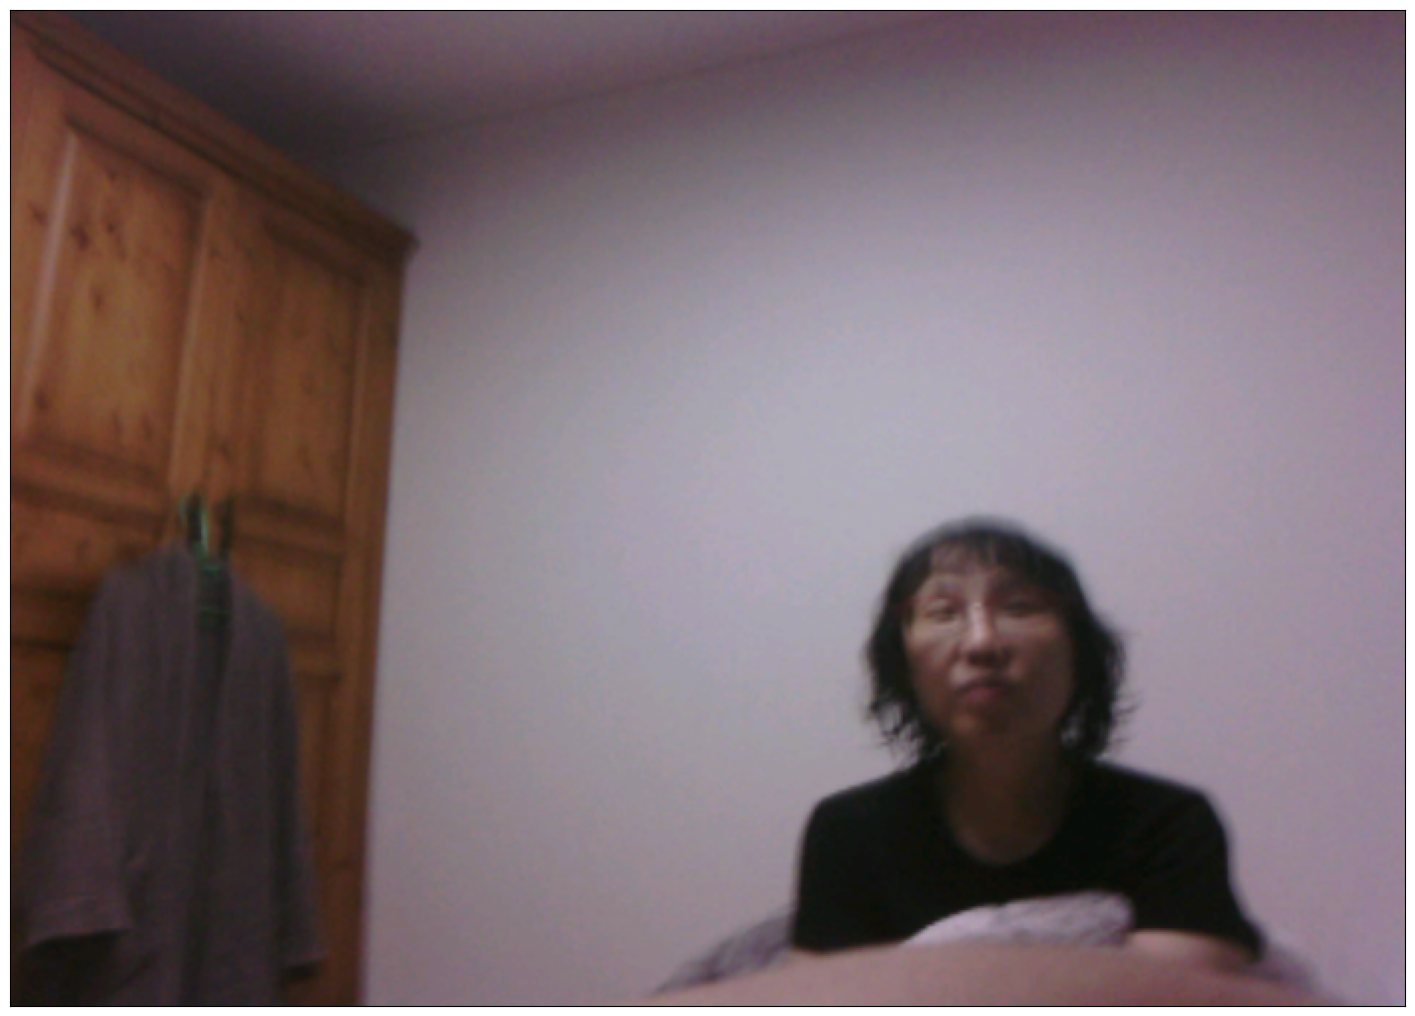

In [110]:
def get_national_team():
    return np.copy(image2_resized)

def show_image(image):
    plt.figure(figsize=(18,15))
    #Before showing image, bgr color order transformed to rgb order
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
    plt.show()
show_image(get_national_team())

In [111]:
def detect_face(image, scaleFactor, minNeighbors, minSize):
    # face will detected in gray image
    image_gray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.imshow(image_gray)
    faces=fd.detect(image_gray,
                   scaleFactor=scaleFactor,
                   minNeighbors=minNeighbors,
                   minSize=minSize)

    for x, y, w, h in faces:
        #detected faces shown in color image
        cv2.rectangle(image,(x,y),(x+w, y+h),(127, 255,0),3)

    show_image(image)

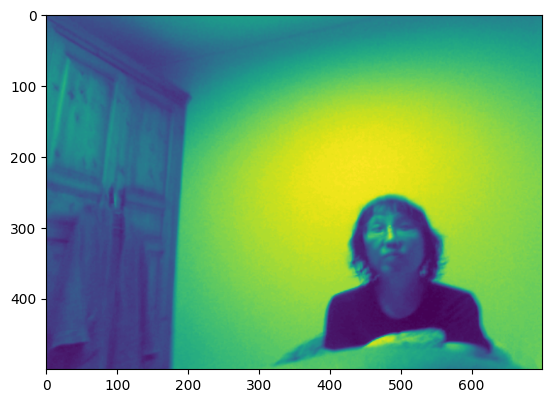

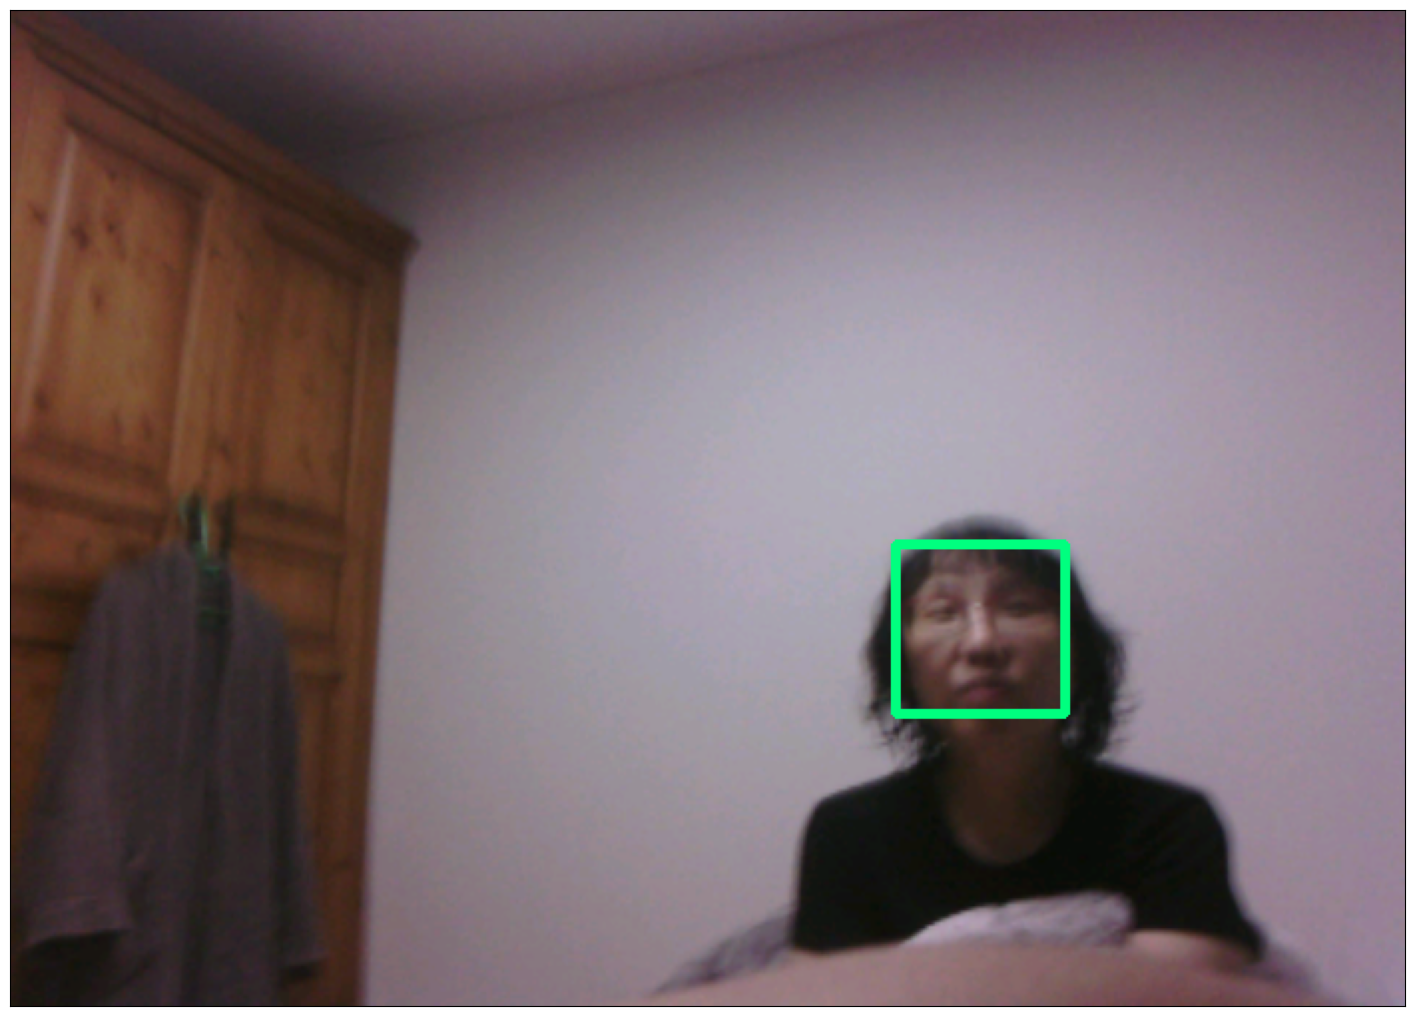

In [112]:
national_team=get_national_team()
#Let's play around function parameters
detect_face(image=national_team, 
            scaleFactor=1.05, 
            minNeighbors=3, 
            minSize=(30,30))